In [3]:
import pandas as pd

# Set the display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', 500)
# Read the Excel file
df_raw = pd.read_csv('/Users/srisatyaindukuri/Spider/ML - Curricular Analytics - PIDM ONLY.csv')

# Display the first few rows of the DataFrame
df_raw.head(5)


,Pidm,Admit_Code,Admit_Desc,Admit_Term,Admit_Level,Admit_College,Admit_Major_Code,Major_Desc,MULTI,Race,NEW_ETHNICITY,GENDER_Code,GENDER,CITZ_IND,CITZ_CODE,CITZ_DESC,Final_GPA,ACTE,ACTM,ACTR,ACTS,EACT,SAT-ERW,SATM,SAT_TOTAL,Term,CRN,SUBJ,CRSE_NUMB,Repeat_Ind,SHRTCKG_GRDE_CODE_FINAL
0,285,FS,Former USF Student Returning,202101,UG,SA,BGS,General Studies,NaN,W White,NaN,F,Female,Y,C,Citizen (USA),NaN,-,-,-,-,-,-,-,-,202101.0,10803.0,LIS,3361,NaN,A
1,285,FS,Former USF Student Returning,202101,UG,SA,BGS,General Studies,NaN,W White,NaN,F,Female,Y,C,Citizen (USA),NaN,-,-,-,-,-,-,-,-,202101.0,16614.0,LIS,3353,NaN,A-
2,285,FS,Former USF Student Returning,202101,UG,SA,BGS,General Studies,NaN,W White,NaN,F,Female,Y,C,Citizen (USA),NaN,-,-,-,-,-,-,-,-,202101.0,24972.0,COP,2030,NaN,B+
3,285,FS,Former USF Student Returning,202101,UG,SA,BGS,General Studies,NaN,W White,NaN,F,Female,Y,C,Citizen (USA),NaN,-,-,-,-,-,-,-,-,202101.0,26205.0,CIS,4510,NaN,A
4,285,FS,Former USF Student Returning,202101,UG,SA,BGS,General Studies,NaN,W White,NaN,F,Female,Y,C,Citizen (USA),NaN,-,-,-,-,-,-,-,-,202105.0,54564.0,LIS,4365,NaN,W


In [4]:
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679269 entries, 0 to 2679268
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Pidm                     int64  
 1   Admit_Code               object 
 2   Admit_Desc               object 
 3   Admit_Term               int64  
 4   Admit_Level              object 
 5   Admit_College            object 
 6   Admit_Major_Code         object 
 7   Major_Desc               object 
 8   MULTI                    object 
 9   Race                     object 
 10  NEW_ETHNICITY            object 
 11  GENDER_Code              object 
 12  GENDER                   object 
 13  CITZ_IND                 object 
 14  CITZ_CODE                object 
 15  CITZ_DESC                object 
 16  Final_GPA                float64
 17  ACTE                     object 
 18  ACTM                     object 
 19  ACTR                     object 
 20  ACTS                     object 
 21  EACT    

In [5]:
df_raw.isna().sum()

Pidm                             0
Admit_Code                       0
Admit_Desc                       0
Admit_Term                       0
Admit_Level                      0
Admit_College                    0
Admit_Major_Code                 0
Major_Desc                       0
MULTI                      2532983
Race                        275295
NEW_ETHNICITY               120342
GENDER_Code                      0
GENDER                           0
CITZ_IND                     15712
CITZ_CODE                        0
CITZ_DESC                        0
Final_GPA                   112534
ACTE                             0
ACTM                             0
ACTR                             0
ACTS                             0
EACT                             0
SAT-ERW                          0
SATM                             0
SAT_TOTAL                        0
Term                          7419
CRN                           7419
SUBJ                          7419
CRSE_NUMB           

In [6]:
df1 = df_raw['Admit_Desc'].unique()
print(df1)

['Former USF Student Returning' 'Second Baccalaureate'
 'Fl Comm Coll Transf-Upper Levl' 'Other UG Transf - Upper Level'
 'Beginner(FTIC) - Lower Level' 'Fl Comm Coll Transf-Lower Levl'
 'Other UG Transf - Lower Level' 'Early Admit - Lower Level'
 'Beginner(FTIC) - w/ AA']


In [7]:
# DataFrame and 'Admit_Desc' is the column containing the descriptions
student_counts = df_raw['Admit_Desc'].value_counts()

# Print the result
print(student_counts)

Admit_Desc
Beginner(FTIC) - Lower Level      1858276
Fl Comm Coll Transf-Upper Levl     345732
Other UG Transf - Lower Level      196225
Fl Comm Coll Transf-Lower Levl      85266
Other UG Transf - Upper Level       75543
Former USF Student Returning        67185
Second Baccalaureate                48724
Early Admit - Lower Level            2282
Beginner(FTIC) - w/ AA                 36
Name: count, dtype: int64


Different admit levels have different info about their admit score how to standardize them?

In [8]:
# Filter for beginners
beginner_students = df_raw[df_raw['Admit_Desc'].str.contains('Beginner', case=False, na=False)]

# Further filter for "S" or "M" in the 'Repeat' column
students_with_s_or_m_repeat = beginner_students[beginner_students['Repeat_Ind'].str.contains('S|M', case=False, na=False)]

# Get the count of such students
count_of_students = students_with_s_or_m_repeat.shape[0]

# Print the result
print(f"Number of beginner entries with 'S' or 'M' in Repeat: {count_of_students}")

Number of beginner entries with 'S' or 'M' in Repeat: 63744


In [15]:
# Function to analyze failure rates and number of students per class
def analyze_failure_rates(df):
    # Define failing grades
    failing_grades = ['F', 'IF', 'W','D-', 'F', 'D+', 'D#', 'D+', 'F#', 'D', 'D', 'D-','U','W','F*','D*','CF','I','FF','Z','W*', 'F+', 'F-', 'F#', 'F*','D-*','IF','IF*', 'D+*','CIF','Z*', 'IU','M', 'CI', 'MU', 'U*', 'ID', 'IB', 'IU*', 'IS', 'CW']
    
    # Count total number of students per class
    students_per_class = df.groupby(['SUBJ', 'CRSE_NUMB']).size().reset_index(name='Total_Students')
    
    # Count total number of failures per class
    failures_per_class = df[df['SHRTCKG_GRDE_CODE_FINAL'].isin(failing_grades)].groupby(['SUBJ', 'CRSE_NUMB']).size().reset_index(name='Total_Failures')
    
    # Merge both dataframes to get total students and failures in one dataframe
    result = pd.merge(students_per_class, failures_per_class, on=['SUBJ', 'CRSE_NUMB'], how='left')
    result['Total_Failures'] = result['Total_Failures'].fillna(0)  # Fill NaN with 0 for classes with no failures
    result['Failure_Rate'] = (result['Total_Failures'] / result['Total_Students']) * 100  # Calculate failure rate
    # Filter classes where failure rate > 10% and total students > 1000
    result = result[(result['Failure_Rate'] > 10) & (result['Total_Students'] > 1000)]
    return result

# Analyze failure rates and total students per class
failure_analysis = analyze_failure_rates(df_raw)
print(failure_analysis)

     SUBJ CRSE_NUMB  Total_Students  Total_Failures  Failure_Rate
0     ACG      2021           13474          2716.0     20.157340
3     ACG      3074            1049           196.0     18.684461
4     ACG      3103            2923           762.0     26.069107
5     ACG      3113            2121           309.0     14.568600
6     ACG      3341            2586           472.0     18.252127
104   AMH      2010            1629           163.0     10.006139
214   ANT      3101            4407           569.0     12.911278
268   ANT      4930            1468           152.0     10.354223
273   APK      3120            1758           260.0     14.789534
327   ARH      2050            3132           404.0     12.899106
410   ASL     2140C            3839           592.0     15.420682
471   BCH      3053            9655          1044.0     10.813050
526   BSC      1020            2093           240.0     11.466794
527   BSC      2010           19358          3235.0     16.711437
529   BSC 

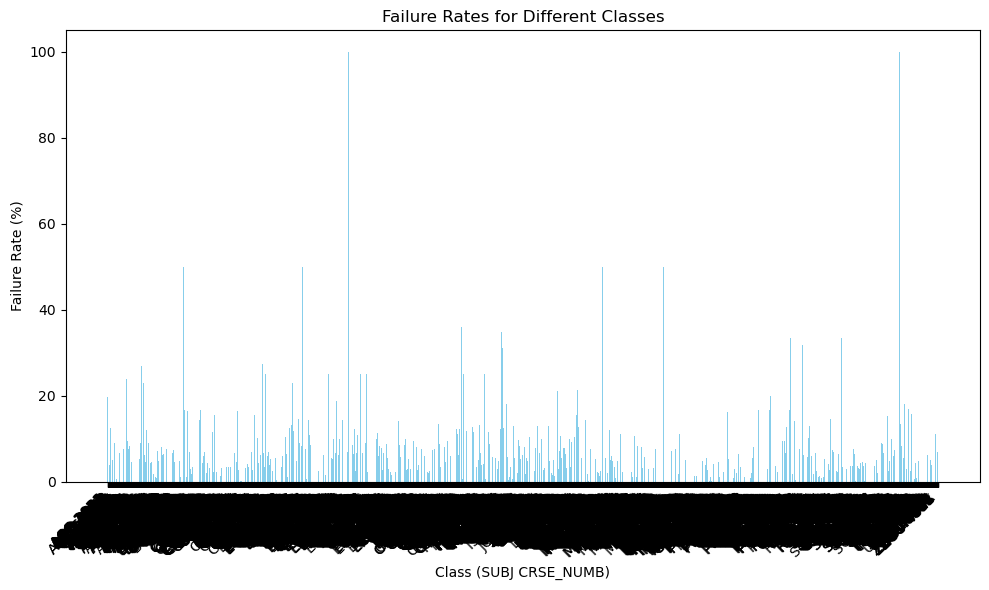

In [ ]:
import matplotlib.pyplot as plt

# Plotting failure rates for all the classes
plt.figure(figsize=(10, 6))
plt.bar(failure_analysis['SUBJ'] + " " + failure_analysis['CRSE_NUMB'].astype(str), failure_analysis['Failure_Rate'], color='skyblue')
plt.xlabel('Class (SUBJ CRSE_NUMB)')
plt.ylabel('Failure Rate (%)')
plt.title('Failure Rates for Different Classes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
failing_grades = ['F', 'IF', 'W','D-', 'F*', 'D+*', 'D#', 'D+', 'F#', 'D', 'D*', 'D-*']
# Filter only failing grades
df_failures = df_raw[df_raw['SHRTCKG_GRDE_CODE_FINAL'].isin(failing_grades)]

# Group by student (Pidm) and term, and filter students who failed 2 or more classes
failed_multiple_classes = df_failures.groupby(['Pidm', 'Term']).filter(lambda x: len(x) >= 2)

# Group by Pidm and aggregate Term, SUBJ, CRSE_NUMB into arrays of unique values
result = failed_multiple_classes.groupby('Pidm').agg({
    'Term': lambda x: x.unique().tolist(),        # Collect unique terms
    'SUBJ': lambda x: x.unique().tolist(),        # Collect unique subjects
    'CRSE_NUMB': lambda x: x.unique().tolist(),   # Collect unique course numbers
    'SHRTCKG_GRDE_CODE_FINAL': 'count'            # Count the number of failed classes
}).reset_index()

# Rename the 'SHRTCKG_GRDE_CODE_FINAL' to 'No. of classes the same student failed'
result = result.rename(columns={'SHRTCKG_GRDE_CODE_FINAL': 'No. of classes the same student failed'})
result

,Pidm,Term,SUBJ,CRSE_NUMB,No. of classes the same student failed
0,432,[201908.0],"[MUS, CCJ, IDS]","[4930, 3117, 4934]",3
1,4672,[201601.0],"[SPN, ORI]","[1121, 3004]",2
2,6329,[201808.0],"[ECP, ECO]","[3302, 3203]",2
3,12515,[202108.0],"[PHY, STA]","[2020, 2023]",2
4,17439,[201701.0],[ECH],"[4323C, 4615]",2
...,...,...,...,...,...
27492,3969732,[202405.0],"[SLS, SPC]","[1107, 2608]",2
27493,3969884,[202405.0],"[PHI, STA]","[2010, 2023]",2
27494,3970764,[202405.0],"[HUN, MUL]","[2201, 2010]",2
27495,3975011,[202405.0],"[IDS, HSC]","[2378, 2100]",2


In [ ]:
failing_grades = ['F', 'IF', 'W','D-', 'F*', 'D+*', 'D#', 'D+', 'F#', 'D', 'D*', 'D-*']
# Filter only failing grades
df_failures = df_raw[df_raw['SHRTCKG_GRDE_CODE_FINAL'].isin(failing_grades)]

# Group by student (Pidm) and term, and filter students who failed 2 or more classes
failed_multiple_classes = df_failures.groupby(['Pidm', 'Term']).filter(lambda x: len(x) >= 2)

# Extract the necessary columns for the result
result1 = failed_multiple_classes[['Pidm', 'Term', 'SUBJ', 'CRSE_NUMB', 'SHRTCKG_GRDE_CODE_FINAL']].copy()
# Add a new column 'Pidm_count' that shows the count of each 'Pidm'
result1.loc[:, 'No. of classes the same student failed'] = result1.groupby('Pidm')['Pidm'].transform('count')

# Display the result
result1.sample(10)

,Pidm,Term,SUBJ,CRSE_NUMB,SHRTCKG_GRDE_CODE_FINAL,No. of classes the same student failed
431593,3126185,201601.0,MAC,1147,D,7
2442914,3711435,202301.0,MAC,2233,F,7
990613,3289189,201801.0,MAA,4402,D,5
1857131,3520801,202008.0,PSY,2012,F,6
409280,3119058,201508.0,MAC,2241,D-,2
2335791,3660380,202401.0,REL,3850,F,9
472920,3145766,201701.0,ECH,3002,W,9
402657,3116832,201808.0,EDF,3132,F,6
529724,3166925,201508.0,HIS,3938,D+,8
940709,3274785,201708.0,SLS,1107,W,4


In [ ]:
result_filtered = result[result['No. of classes the same student failed'] == 39]
result_filtered

,Pidm,Term,SUBJ,CRSE_NUMB,No. of classes the same student failed
4970,3109033,"[202105.0, 202108.0, 202201.0, 202301.0, 201701.0]","[COM, PHC, GEY, STA, SPA, HSC, PHY, ENC, LIS, REL, LAE, BSC, CHM]","[2000, 4101, 3601, 2023, 3030, 3004, 4624, 2020, 2210, 4785, 3302, 4635, 3850, 4931, 4933, 4414, 2011, 2045, 2011L, 2045L]",39
9573,3250073,"[201701.0, 201708.0, 201801.0, 201805.0, 202008.0, 202101.0, 202108.0, 202201.0]","[PHY, HUM, ENC, PSY, GEY, HSC, EDF, EDG, PHI, GEA, MCB, MUL, HIS, GEO, BOT]","[2054, 1020, 1101, 2012, 3625, 4631, 3604, 3361, 1600, 2000, 3410, 4320, 3001, 3308, 4372, 3850]",39
